In [62]:
import squidpy as sq
import scanpy as sc
import scipy as scp
import numpy as np 
import pandas as pd
import scvi
import seaborn as sns
import pyensembl as ensb

In [60]:
sclcCells = sc.read_h5ad('hlca/sclcCells_singlets.h5ad')
# normalCells = sc.read_h5ad('hlca/normalCells.h5ad')

/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [61]:
sclcCells.var

,feature_is_filtered,original_gene_symbols,feature_name,feature_reference,feature_biotype,feature_length,n_cells,highly_variable,highly_variable_rank,means,variances,variances_norm
ensembl_id,,,,,,,,,,,,
A2M,False,A2M,A2M,NCBITaxon:9606,gene,6318,2723,True,343.0,0.182896,0.348138,1.732289
A2ML1,False,A2ML1,A2ML1,NCBITaxon:9606,gene,7156,25,True,1327.0,0.001470,0.002358,1.338065
ABCA3,False,ABCA3,ABCA3,NCBITaxon:9606,gene,7804,695,True,1379.0,0.043479,0.066376,1.329834
ABCA4,False,ABCA4,ABCA4,NCBITaxon:9606,gene,8547,14,True,1901.0,0.000574,0.000772,1.251592
ABCA8,False,ABCA8,ABCA8,NCBITaxon:9606,gene,11246,119,True,844.0,0.007421,0.013324,1.458765
...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF80,False,ZNF80,ZNF80,NCBITaxon:9606,gene,2948,52,True,1098.0,0.003626,0.006176,1.391990
COL4A1,False,COL4A1,COL4A1,NCBITaxon:9606,gene,14662,608,True,202.0,0.050033,0.109718,1.913396
ERG,False,ERG,ERG,NCBITaxon:9606,gene,7582,189,True,1403.0,0.010607,0.017196,1.326584


In [63]:
sclcCells.var['mitochondrial'] = sclcCells.var.feature_name.str.startswith('MT-') # only one mitochondrial gene, marked as true

In [64]:
ribosomalGeneSet = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt" # filter out ribosomal genes too
df_ribo = pd.read_table(ribosomalGeneSet, skiprows=2, header = None)
sclcCells.var[sclcCells.var.feature_name.isin(df_ribo[0].values)] # # two ribosomal genes
sclcCells.var['ribosomal'] = sclcCells.var.feature_name.isin(df_ribo[0].values) # bool for ribosomal genes

In [67]:
# Calculating QC metrics
sc.pp.calculate_qc_metrics(sclcCells, qc_vars=['mitochondrial', 'ribosomal'])
sclcCells.var


,feature_is_filtered,original_gene_symbols,feature_name,feature_reference,feature_biotype,feature_length,n_cells,highly_variable,highly_variable_rank,means,variances,variances_norm,mitochondrial,ribosomal
ensembl_id,,,,,,,,,,,,,,
A2M,False,A2M,A2M,NCBITaxon:9606,gene,6318,2723,True,343.0,0.182896,0.348138,1.732289,False,False
A2ML1,False,A2ML1,A2ML1,NCBITaxon:9606,gene,7156,25,True,1327.0,0.001470,0.002358,1.338065,False,False
ABCA3,False,ABCA3,ABCA3,NCBITaxon:9606,gene,7804,695,True,1379.0,0.043479,0.066376,1.329834,False,False
ABCA4,False,ABCA4,ABCA4,NCBITaxon:9606,gene,8547,14,True,1901.0,0.000574,0.000772,1.251592,False,False
ABCA8,False,ABCA8,ABCA8,NCBITaxon:9606,gene,11246,119,True,844.0,0.007421,0.013324,1.458765,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF80,False,ZNF80,ZNF80,NCBITaxon:9606,gene,2948,52,True,1098.0,0.003626,0.006176,1.391990,False,False
COL4A1,False,COL4A1,COL4A1,NCBITaxon:9606,gene,14662,608,True,202.0,0.050033,0.109718,1.913396,False,False
ERG,False,ERG,ERG,NCBITaxon:9606,gene,7582,189,True,1403.0,0.010607,0.017196,1.326584,False,False


In [66]:
sclcCells.obs

,suspension_type,donor_id,is_primary_data,assay_ontology_term_id,cell_type_ontology_term_id,development_stage_ontology_term_id,disease_ontology_term_id,self_reported_ethnicity_ontology_term_id,tissue_ontology_term_id,organism_ontology_term_id,...,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid,_scvi_batch,_scvi_labels,singlet
scrBT1428_CCACGGATCGCATGGC_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0000625,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,squamous cell lung carcinoma,Homo sapiens,unknown,lung,unknown,unknown,kok@4pR6O8,0,0,True
BT1248_GGACAGGATGACCA_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0000625,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,squamous cell lung carcinoma,Homo sapiens,unknown,lung,unknown,unknown,wxUib0^bFj,0,0,True
scrBT1428_TATGCCCTCCACTGGG_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0002063,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,squamous cell lung carcinoma,Homo sapiens,unknown,lung,unknown,unknown,t;Y`(D7%Y~,0,0,True
scrBT1426_ATTCTACTCTGTGCAA_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0000236,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,squamous cell lung carcinoma,Homo sapiens,unknown,lung,unknown,unknown,0=fyWhM>W7,0,0,True
scrBT1428_GGACGTCAGCTAACAA_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0002144,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,squamous cell lung carcinoma,Homo sapiens,unknown,lung,unknown,unknown,GhFu_CKEE-,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scrBT1428_AGACGTTTCTATCGCC_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0000583,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,squamous cell lung carcinoma,Homo sapiens,unknown,lung,unknown,unknown,&|+z*D`I)J,0,0,True
scrBT1427_CCCTCCTTCCCTTGTG_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0000624,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,squamous cell lung carcinoma,Homo sapiens,unknown,lung,unknown,unknown,hskfC(8B79,0,0,True
scrBT1428_AACTCCCTCAGATAAG_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0002144,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,squamous cell lung carcinoma,Homo sapiens,unknown,lung,unknown,unknown,7Bb>U?`BZg,0,0,True
scrBT1428_GACTACACAGATTGCT_lambrechts,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0030003,CL:0000625,unknown,MONDO:0005097,unknown,UBERON:0002048,NCBITaxon:9606,...,squamous cell lung carcinoma,Homo sapiens,unknown,lung,unknown,unknown,EF(B&MU(_w,0,0,True


In [69]:
sc.pp.filter_genes(sclcCells, min_cells=3)# from the df below, each gene is present in a minimum of 10 cells
# sc.pp.filter_cells(sclcCells, min_genes=20)# from the df below, each gene is present in a minimum of 10 cells

/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


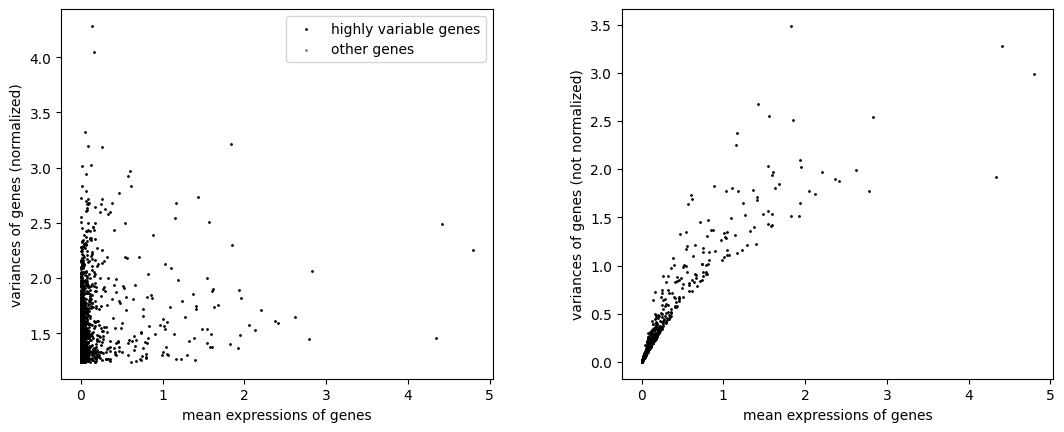

In [68]:
sc.pl.highly_variable_genes(sclcCells)

In [59]:
sc.pl.violin(sclcCells, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], jitter=0.4, multi_panel=True)

KeyError: "Could not find keys '['n_genes_by_counts', 'pct_counts_mt', 'pct_counts_ribo']' in columns of `adata.obs` or in adata.raw.var_names."